In [1]:
import os

In [2]:
os.chdir('F:\\PGP-DSBA\\10.1 MRA(Marketing and Retail)\\PROJECT MRA milestone 1')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel('Sales_Data.xlsx')

### Head and Tail of Dataset

In [5]:
display(df.head())
display(df.tail())

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,2020-05-06,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


### Shape of Dataset

In [6]:
df.shape

(2747, 20)

### Info of Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

### Joining First and Last Name

In [8]:
df['Contact_fullname'] = df[['CONTACTFIRSTNAME','CONTACTLASTNAME']].apply(lambda x: ' '.join(x), axis=1)

In [9]:
df['Contact_fullname']

0                Kwai Yu
1           Paul Henriot
2        Daniel Da Cunha
3            Julie Young
4            Juri Hirano
              ...       
2742        Diego Freyre
2743    Pirkko Koskitalo
2744        Diego Freyre
2745      Annette Roulet
2746        Juri Yoshido
Name: Contact_fullname, Length: 2747, dtype: object

In [10]:
df.drop(['CONTACTFIRSTNAME','CONTACTLASTNAME'],axis=1,inplace=True)

### Cleaning the Column names 

In [11]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE', 'Contact_fullname'],
      dtype='object')

In [12]:
df.columns=['ORDER_NO', 'QUANTITY_ORDERED', 'UNIT_PRICE', 'ORDER_LINE_NO',
       'SALES', 'ORDER_DATE', 'RECENCY', 'STATUS', 'PRODUCT_LINE',
       'MSRP', 'PRODUCT_CODE', 'CUSTOMER_NAME', 'PHONE', 'ADDRESS', 'CITY',
       'POSTAL_CODE', 'COUNTRY', 'DEALSIZE', 'CONTACT_FULLNAME']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDER_NO          2747 non-null   int64         
 1   QUANTITY_ORDERED  2747 non-null   int64         
 2   UNIT_PRICE        2747 non-null   float64       
 3   ORDER_LINE_NO     2747 non-null   int64         
 4   SALES             2747 non-null   float64       
 5   ORDER_DATE        2747 non-null   datetime64[ns]
 6   RECENCY           2747 non-null   int64         
 7   STATUS            2747 non-null   object        
 8   PRODUCT_LINE      2747 non-null   object        
 9   MSRP              2747 non-null   int64         
 10  PRODUCT_CODE      2747 non-null   object        
 11  CUSTOMER_NAME     2747 non-null   object        
 12  PHONE             2747 non-null   object        
 13  ADDRESS           2747 non-null   object        
 14  CITY              2747 n

### Checking for Null Dataset

In [14]:
df.isnull().sum()

ORDER_NO            0
QUANTITY_ORDERED    0
UNIT_PRICE          0
ORDER_LINE_NO       0
SALES               0
ORDER_DATE          0
RECENCY             0
STATUS              0
PRODUCT_LINE        0
MSRP                0
PRODUCT_CODE        0
CUSTOMER_NAME       0
PHONE               0
ADDRESS             0
CITY                0
POSTAL_CODE         0
COUNTRY             0
DEALSIZE            0
CONTACT_FULLNAME    0
dtype: int64

### Checking for duplicates in the dataset

In [15]:
df.duplicated().sum()

0

In [16]:
df['ORDER_NO'] = df['ORDER_NO'].astype('object')
df['ORDER_LINE_NO'] = df['ORDER_LINE_NO'].astype('object')

### Descriptive Summary of Dataset

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
QUANTITY_ORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
UNIT_PRICE,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
RECENCY,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [18]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
ORDER_NO,2747,298,10106,18
ORDER_LINE_NO,2747,18,1,298
STATUS,2747,6,Shipped,2541
PRODUCT_LINE,2747,7,Classic Cars,949
PRODUCT_CODE,2747,109,S18_3232,51
CUSTOMER_NAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESS,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTAL_CODE,2747,73,28034,259


### Univariate Analysis of Continuous Variables

In [19]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end='\n')
    
    print("\n Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(np.round(df[column].skew(),4),end='\n')
    
    print("\n Histogram and Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
    print(sns.histplot(df[column], kde=True, color='c', ax=axs[0]))
    print(sns.boxplot(x=df[column], ax=axs[1],color='r'))
    plt.show();

### QUANTITY_ORDERED

Description of QUANTITY_ORDERED
----------------------------------------------------------------------------
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITY_ORDERED, dtype: float64

 Skewness of QUANTITY_ORDERED
----------------------------------------------------------------------------
0.3693

 Histogram and Boxplot of QUANTITY_ORDERED
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


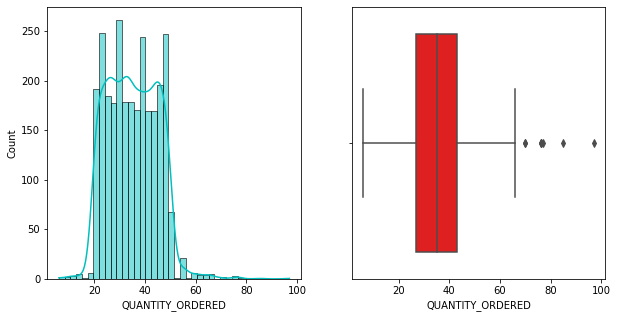

In [20]:
univariateAnalysis_numeric('QUANTITY_ORDERED',200)

In [21]:
df['ORDER_LINE_NO'].value_counts()

1     298
2     282
3     261
4     247
5     231
6     213
7     191
8     182
9     162
10    139
11    127
12    109
13     96
14     80
15     55
16     41
17     24
18      9
Name: ORDER_LINE_NO, dtype: int64

### Unit Price

Description of UNIT_PRICE
----------------------------------------------------------------------------
count    2747.000000
mean      101.098951
std        42.042548
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: UNIT_PRICE, dtype: float64

 Skewness of UNIT_PRICE
----------------------------------------------------------------------------
0.6972

 Histogram and Boxplot of UNIT_PRICE
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


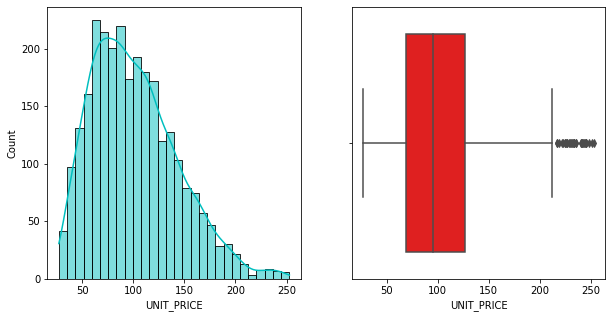

In [22]:
univariateAnalysis_numeric('UNIT_PRICE',200)

### RECENCY

Description of RECENCY
----------------------------------------------------------------------------
count    2747.000000
mean     1757.085912
std       819.280576
min        42.000000
25%      1077.000000
50%      1761.000000
75%      2436.500000
max      3562.000000
Name: RECENCY, dtype: float64

 Skewness of RECENCY
----------------------------------------------------------------------------
-0.003

 Histogram and Boxplot of RECENCY
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


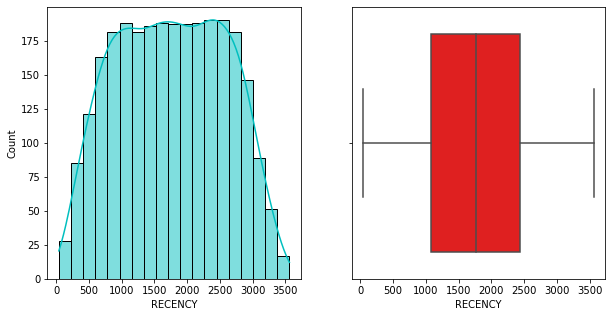

In [23]:
univariateAnalysis_numeric('RECENCY',200)

### Manufacturer's Suggested Retail Price

Description of MSRP
----------------------------------------------------------------------------
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64

 Skewness of MSRP
----------------------------------------------------------------------------
0.5756

 Histogram and Boxplot of MSRP
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


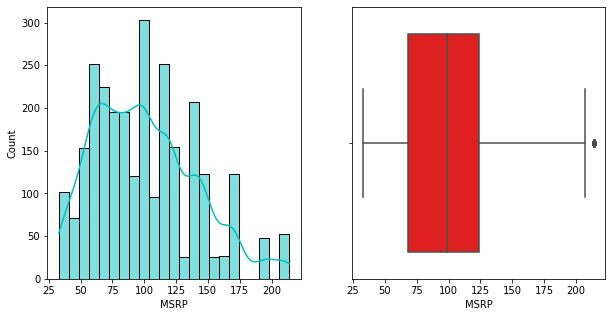

In [24]:
univariateAnalysis_numeric('MSRP',200)

Description of SALES
----------------------------------------------------------------------------
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64

 Skewness of SALES
----------------------------------------------------------------------------
1.1559

 Histogram and Boxplot of SALES
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


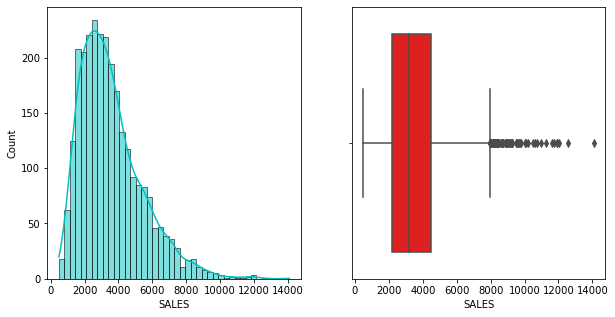

In [25]:
univariateAnalysis_numeric('SALES',200)

### Univariate Analysis of Categorical Variable

In [26]:
df.select_dtypes('object').columns

Index(['ORDER_NO', 'ORDER_LINE_NO', 'STATUS', 'PRODUCT_LINE', 'PRODUCT_CODE',
       'CUSTOMER_NAME', 'PHONE', 'ADDRESS', 'CITY', 'POSTAL_CODE', 'COUNTRY',
       'DEALSIZE', 'CONTACT_FULLNAME'],
      dtype='object')

### Status

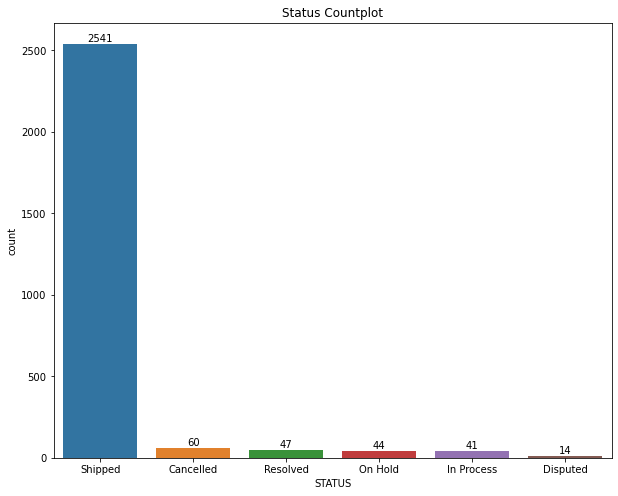

In [27]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='STATUS',data=df,order=df['STATUS'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i)
    plt.title('Status Countplot')
plt.show()

### PRODUCT_LINE

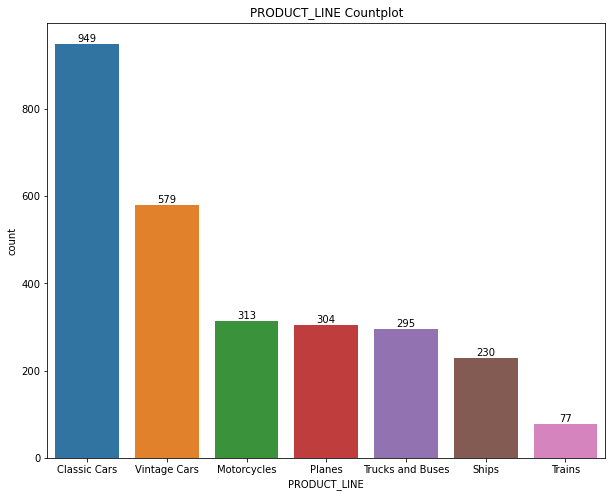

In [28]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='PRODUCT_LINE',data=df,order=df['PRODUCT_LINE'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i)
    plt.title('PRODUCT_LINE Countplot')
plt.show()

### DEALSIZE 

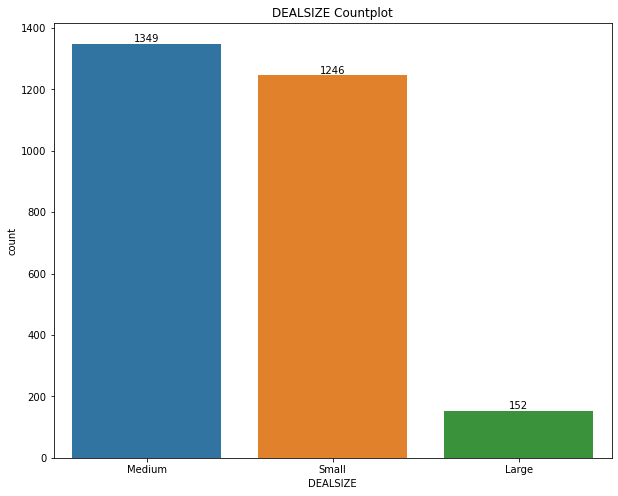

In [29]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='DEALSIZE',data=df,order=df['DEALSIZE'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i)
    plt.title('DEALSIZE Countplot')
plt.show()

### BIVARIATE ANALYSIS

### SALES

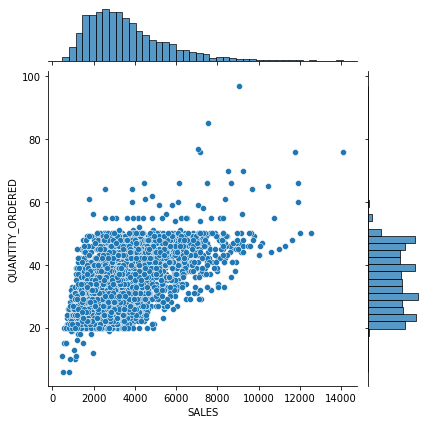

In [30]:
sns.jointplot(x=df['SALES'],y=df['QUANTITY_ORDERED'],data=df)

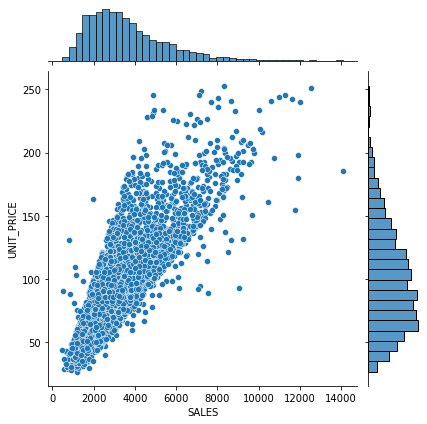

In [31]:
sns.jointplot(x=df['SALES'],y=df['UNIT_PRICE'],data=df)

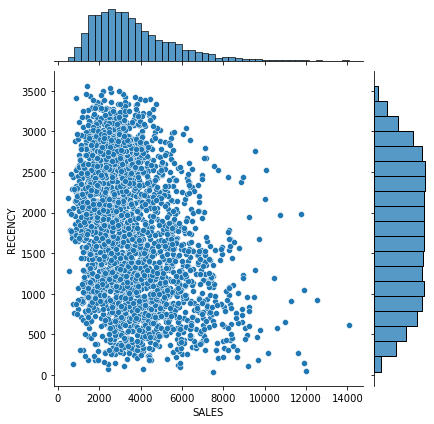

In [32]:
sns.jointplot(x=df['SALES'],y=df['RECENCY'],data=df)

<AxesSubplot:xlabel='SALES', ylabel='PRODUCT_LINE'>

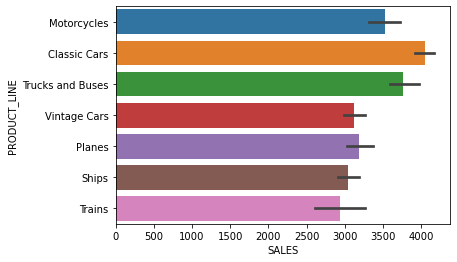

In [33]:
sns.barplot(x=df['SALES'],y=df['PRODUCT_LINE'],data=df)

<AxesSubplot:xlabel='SALES', ylabel='STATUS'>

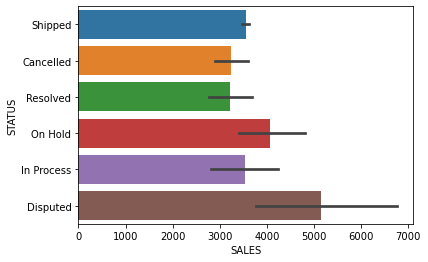

In [34]:
sns.barplot(x=df['SALES'],y=df['STATUS'],data=df,order=df['STATUS'].value_counts().index)

### Multivariate Analysis

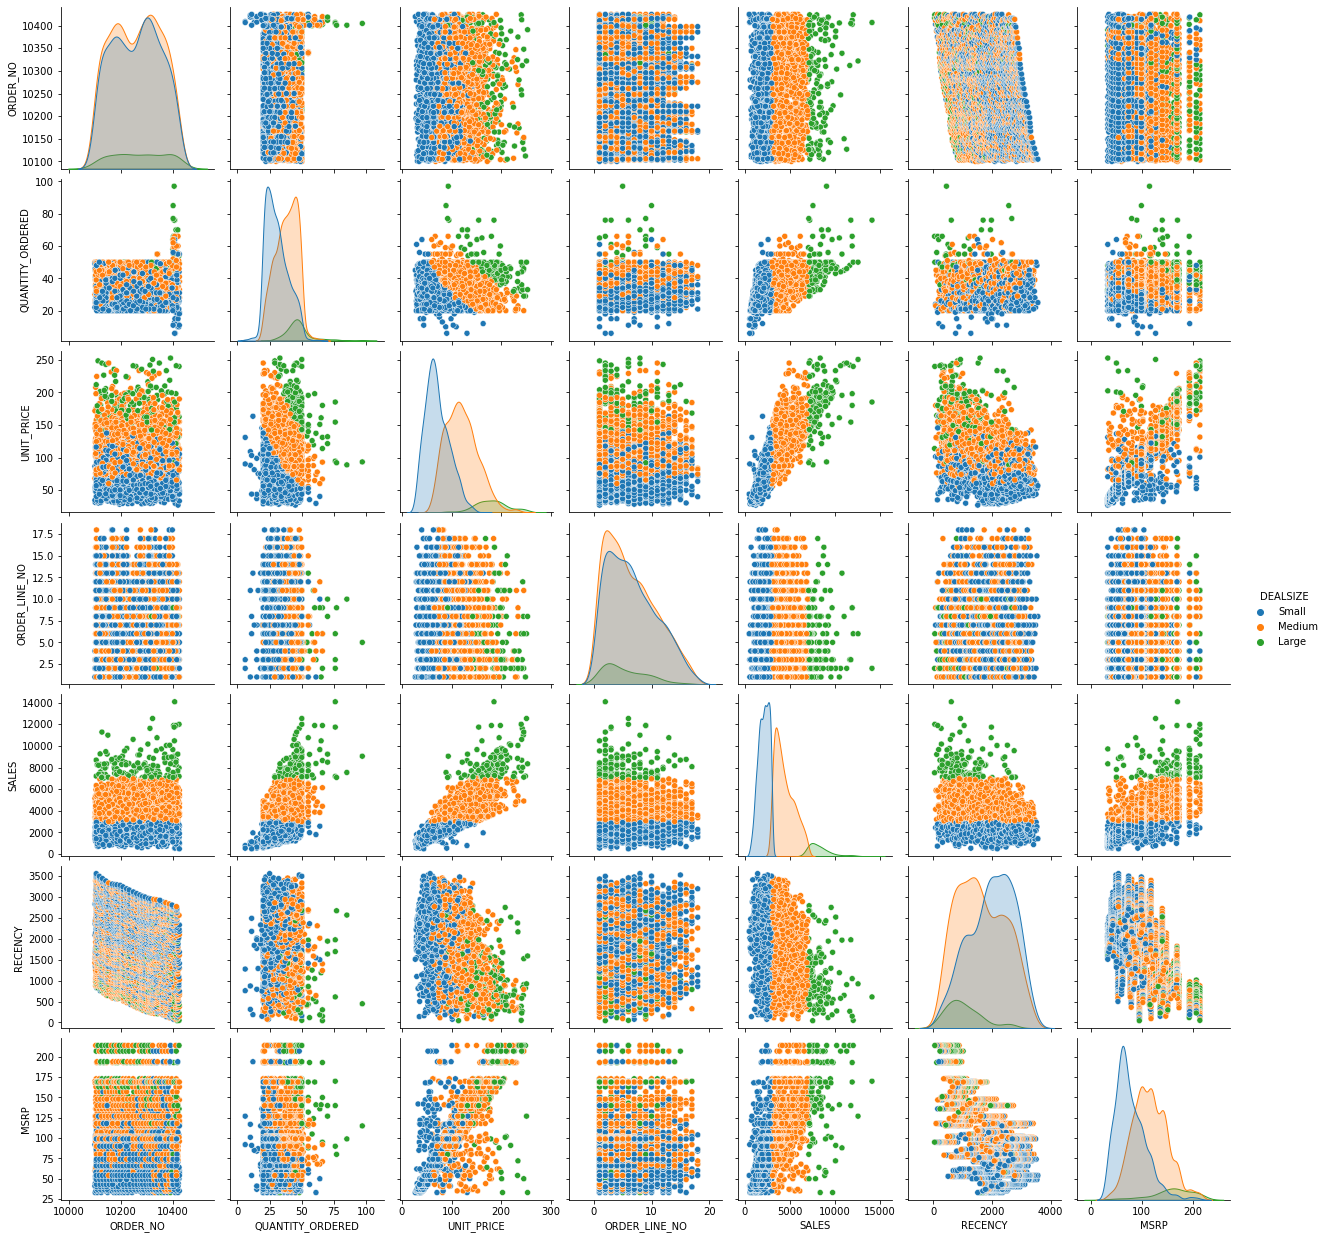

In [35]:
sns.pairplot(data=df,diag_kind='kde',hue='DEALSIZE')
plt.grid()
plt.show()

In [36]:
corr=df.corr()

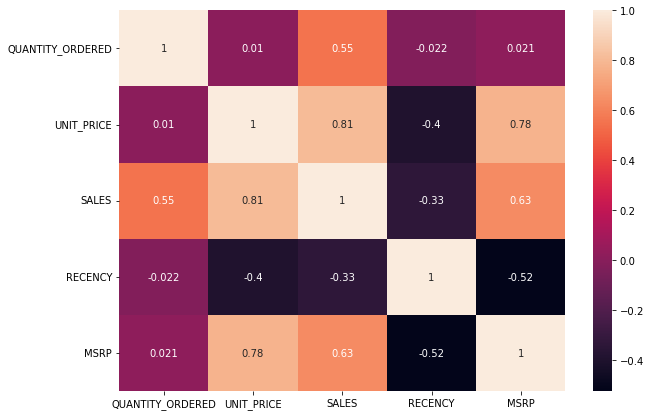

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,cbar=True)
plt.show()

In [39]:
df.to_excel('Sales_MRA_EDA.xlsx',index=False,sheet_name='SALES_MRA')

In [40]:
df_new=pd.read_excel("Sales_MRA_EDA.xlsx")
df_new.head()

,ORDER_NO,QUANTITY_ORDERED,UNIT_PRICE,ORDER_LINE_NO,SALES,ORDER_DATE,RECENCY,STATUS,PRODUCT_LINE,MSRP,PRODUCT_CODE,CUSTOMER_NAME,PHONE,ADDRESS,CITY,POSTAL_CODE,COUNTRY,DEALSIZE,CONTACT_FULLNAME
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small,Kwai Yu
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small,Paul Henriot
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium,Daniel Da Cunha
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium,Julie Young
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Medium,Juri Hirano
